# The CNN Baseline 3 Notebook

##### This notebook contains the baseline model_3 based on paper 5, using the Adam optimizer.

## Import the Relevant Libraries

In [1]:
# TensorFlow is a library containing multiple machine learning tasks
import tensorflow as tf

In [2]:
# Keras, a high-level neural networks API, that runs on top of TensorFlow
# Enables building deep neural networks
from tensorflow import keras

In [3]:
# Print the versions
print("\033[1m" + "\033[4m" + "Versions in Use" + "\033[0;0m") 
print("TensorFlow: ", tf.__version__)
print("Keras: ", keras.__version__)

Versions in Use
TensorFlow:  2.11.0
Keras:  2.11.0


In [4]:
# Import the models module from the Keras library
# Provides tools for constructing, training, and evaluating neural network models
from keras import models

In [5]:
# Used to instantiate a Keras tensor
from keras import Input

In [6]:
# Layers are the basic building blocks of neural networks in Keras
from keras import layers

In [7]:
# Allows for creation of neural network models
from keras.models import Model

In [8]:
# It generates batches of tensor image data with real-time data augmentation
# Ensuring all data is in the same format 
from keras.preprocessing.image import ImageDataGenerator

In [9]:
# Provides various algorithms for optimizing neural network training, such as SGD, Adam, RMSprop, etc.
from keras import optimizers

In [10]:
# Allows for implementation of early stopping in callbacks
from keras.callbacks import EarlyStopping

In [11]:
# Allows for implementation of model check points in callbacks
from keras.callbacks import ModelCheckpoint

In [12]:
# Allows for implementation of TensorBoard in callbacks
from keras.callbacks import TensorBoard

In [13]:
# Used for hyperparameter optimization
import keras_tuner

In [14]:
# Allows for plotting of figures 
import matplotlib.pyplot as plt

In [15]:
# Allows for plotting of confusion matrix heatmap 
import seaborn as sns

In [16]:
# Allows for creating of classification report and confusion matrix  
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Needed for TensorBoard 
import datetime

In [18]:
# Allows for the loading of a model
from tensorflow.keras.models import load_model

## Creating the Model with Keras API

#### Paper 5

In [19]:
# Input
image_input = Input(shape = (512, 512, 1))

# First layer
conv_1 = layers.Conv2D(32, kernel_size = (3, 3), strides = (2, 2), activation = "relu")(image_input) 
max_1 = layers.MaxPooling2D(pool_size = (3, 3), strides = (3, 3))(conv_1) 

# Second layer
conv_2_1 = layers.Conv2D(64, kernel_size = (3, 3), strides = (2, 2), activation = "relu")(max_1) 
conv_2_2 = layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = "relu")(conv_2_1)
conv_2_3 = layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = "relu")(conv_2_2)
max_2 = layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(conv_2_3) 

# Third layer
conv_3_1 = layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = "relu")(max_2)
conv_3_2 = layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = "relu")(conv_3_1)
conv_3_3 = layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = "relu")(conv_3_2)
max_3 = layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(conv_3_3) 

# Fourth layer
conv_4_1 = layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = "relu")(max_3)
conv_4_2 = layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = "relu")(conv_4_1)
max_4 = layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(conv_4_2)


# Add a classifier
# Flattening layer
flat = layers.Flatten()(max_4)

# Dense 1 layer
den_1 = layers.Dense(1024)(flat)

# Dense 2 layer
den_2 = layers.Dense(2)(den_1)

# Output layer
out_1 = layers.Dense(1, activation = "sigmoid")(den_2)


# Define the model
model_3 = Model(image_input, out_1)

## Display the Architecture of the Convnet

In [20]:
# Print out the summary of the model
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 64)        36928     
                                                             

In [21]:
# Set the png dot image file's path
# Paper 3 - model_1
# Paper 4 - model_2
# Paper 5 - model_3
dot_img_file = "logs_graph/model_3.png"

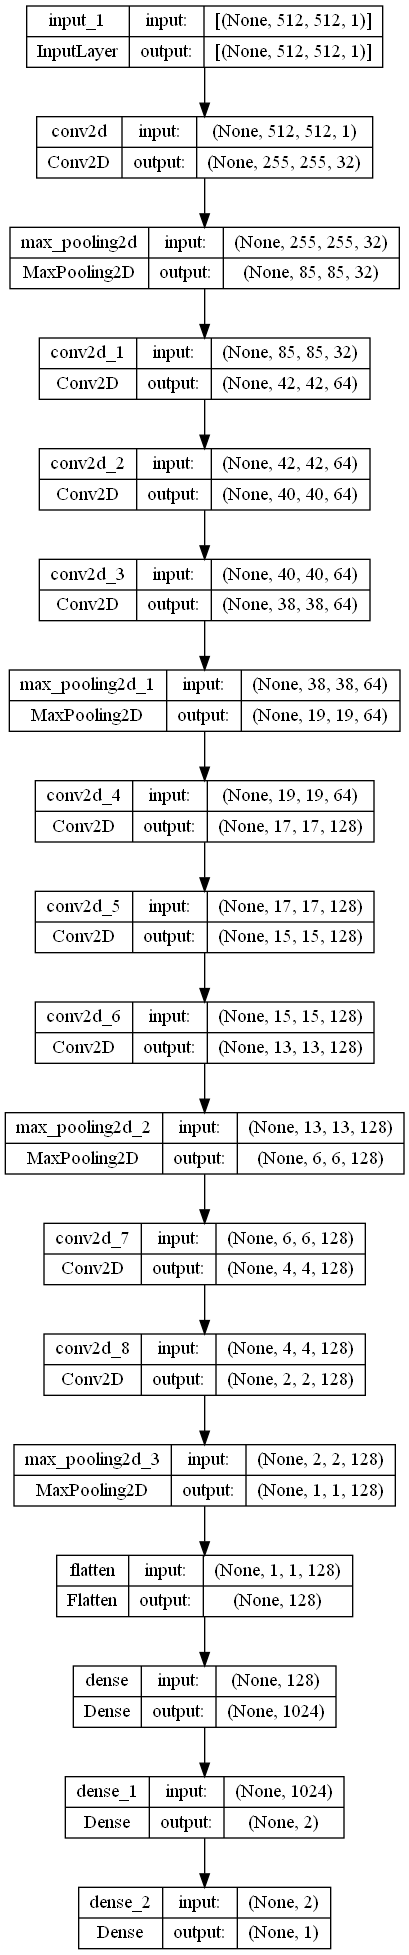

In [22]:
# Plot vertically
tf.keras.utils.plot_model(model_3, to_file = dot_img_file, show_shapes = True, rankdir = "TB")

## Configuring the Model

RMSprop and Adam used

In [23]:
# Compile the model
model_3.compile(loss = keras.losses.BinaryCrossentropy(), 
                optimizer = keras.optimizers.Adam(learning_rate = 3e-4), 
                metrics = [keras.metrics.BinaryAccuracy(name = "accuracy"),
                           keras.metrics.Precision(), 
                           keras.metrics.Recall(), 
                           keras.metrics.TruePositives(),
                           keras.metrics.TrueNegatives(),
                           keras.metrics.FalsePositives(),
                           keras.metrics.FalseNegatives()])

## Define Directory Paths
- train_path contains the training images.
- validation_path contains the validation images.
- test_path contains the testing images.
- Split ratio are:
    * Training: 75%
    * Validation: 15%
    * Testing: 10%

In [24]:
train_path = "RSNA_PNG_Mammograms_512/RSNA_PNG_Mammograms_512_Split/train_img/"
validation_path = "RSNA_PNG_Mammograms_512/RSNA_PNG_Mammograms_512_Split/val_img/"
test_path = "RSNA_PNG_Mammograms_512/RSNA_PNG_Mammograms_512_Split/test_img/"

## Using ImageDataGenerator to Read Images from Directories

In [25]:
# Rescale the images
image_gen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Create a generator for the training images 
train_generator = image_gen.flow_from_directory(train_path,
                                                target_size = (512, 512), 
                                                color_mode = "grayscale",
                                                batch_size = 20, 
                                                class_mode = "binary")

Found 1736 images belonging to 2 classes.


In [27]:
# Create a generator for the validation images 
validation_generator = image_gen.flow_from_directory(validation_path, 
                                                     target_size = (512, 512),
                                                     color_mode = "grayscale",
                                                     batch_size = 20, 
                                                     class_mode = "binary")

Found 348 images belonging to 2 classes.


In [28]:
# Create a generator for the testing images 
test_generator = image_gen.flow_from_directory(test_path, 
                                               target_size = (512, 512),
                                               color_mode = "grayscale",
                                               batch_size = 20, 
                                               class_mode = "binary")

Found 232 images belonging to 2 classes.


In [29]:
# Print the classes available
train_generator.class_indices

{'cancer': 0, 'no_cancer': 1}

In [30]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 512, 512, 1)
labels batch shape: (20,)


## Early Stopping
Interrupting training when the validation loss is no longer improving.

In [31]:
# Create the early stopping callback
early_stop = EarlyStopping(monitor = "val_loss", 
                           patience = 3)

## Model Checkpoint
Save the current weights of the model at different points during training.

In [32]:
# Create the model check callback
model_check = ModelCheckpoint(filepath = "logs_model/model_check.h5",
                              monitor = "val_loss",
                              save_best_only = True)

## TensorBoard 
TensorBoard provides the visualization and tooling.

In [33]:
# Set the file name
file_name = "model_3"

In [34]:
# Create the tensorboard callback
tensorboard_callback = TensorBoard(log_dir = "logs_tensorboard/{}".format(file_name), histogram_freq = 1)

## Training the Model

In [34]:
# Fit the model 
history = model_3.fit(train_generator,
                         epochs = 20,
                         batch_size = 20, 
                         validation_data = validation_generator,
                         callbacks = [early_stop, model_check, tensorboard_callback])

Epoch 1/20
87/87 [==============================] - 26s 279ms/step - loss: 0.6938 - accuracy: 0.4896 - precision: 0.4908 - recall: 0.5541 - true_positives: 481.0000 - true_negatives: 369.0000 - false_positives: 499.0000 - false_negatives: 387.0000 - val_loss: 0.6932 - val_accuracy: 0.5115 - val_precision: 0.5074 - val_recall: 0.7931 - val_true_positives: 138.0000 - val_true_negatives: 40.0000 - val_false_positives: 134.0000 - val_false_negatives: 36.0000
Epoch 2/20
87/87 [==============================] - 24s 273ms/step - loss: 0.6936 - accuracy: 0.5063 - precision: 0.5159 - recall: 0.2051 - true_positives: 178.0000 - true_negatives: 701.0000 - false_positives: 167.0000 - false_negatives: 690.0000 - val_loss: 0.6936 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_true_positives: 174.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 174.0000 - val_false_negatives: 0.0000e+00
Epoch 3/20
87/87 [==============================] - 24s 271ms/step - loss: 0

## Call the Tensorboard

#### By using the following commands in the Anaconda Prompt(mini):
- conda activate tensorflowIO- cd C:\Users\miche\Desktop\CM3070 Final Project Code - 
tensorboard --logdir logs_tensorboard/

## Save the Model

In [35]:
# Save model
model_3.save("logs_model/baseline_model_3.h5")

## Evaluating the Model

### Evaluate using Accuracy and Loss on Training and Validation Files

In [36]:
print(history.params)

{'verbose': 1, 'epochs': 20, 'steps': 87}


In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])


In [38]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
precision = history.history["precision"]
recall = history.history["recall"]

In [39]:
epochs = range(1, len(accuracy) + 1)

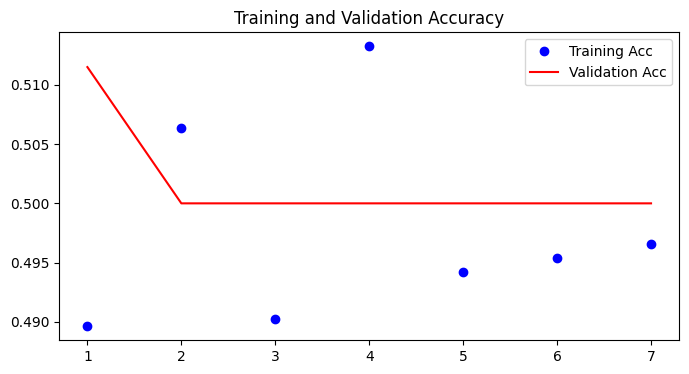

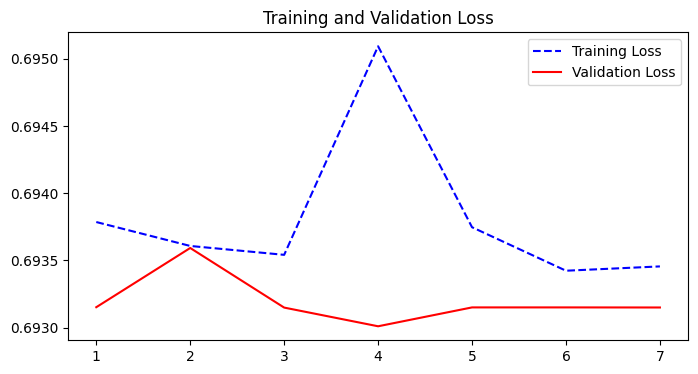

In [40]:
# Make the plot
plt.figure(figsize = (8, 4))

# Define the different values
plt.plot(epochs, accuracy, "bo", label = "Training Acc")
plt.plot(epochs, val_acc, "r", label = "Validation Acc")

# Adding title and legend
plt.title("Training and Validation Accuracy")
plt.legend()

# Make the plot
plt.figure(figsize = (8, 4))

# Define the different values
plt.plot(epochs, loss, "b--", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")

# Adding title and legend
plt.title("Training and Validation Loss")
plt.legend()

# Show the plots
plt.show()

In [41]:
model_3.metrics_names

['loss',
 'accuracy',
 'precision',
 'recall',
 'true_positives',
 'true_negatives',
 'false_positives',
 'false_negatives']

### Evaluate using Confusion Matrix on Testing Files

In [42]:
model_3.evaluate(test_generator)

12/12 [==============================] - 1s 73ms/step - loss: 0.6931 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - true_positives: 116.0000 - true_negatives: 0.0000e+00 - false_positives: 116.0000 - false_negatives: 0.0000e+00


[0.6931489706039429, 0.5, 0.5, 1.0, 116.0, 0.0, 116.0, 0.0]

In [43]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
predictions_probs = model_3.predict(test_generator)

# Print the first 10 predictions probabilities
print(predictions_probs[:10])

12/12 [==============================] - 1s 70ms/step
[[0.5010512 ]
 [0.5010537 ]
 [0.5010519 ]
 [0.5010525 ]
 [0.5010505 ]
 [0.5010512 ]
 [0.5010505 ]
 [0.5010536 ]
 [0.50105226]
 [0.50105083]]


In [45]:
# Create a predictions lists of True and False from the predictions probabilities 
predictions = predictions_probs > 0.5

# Print the first 10 predictions
print(predictions[:10])

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [46]:
report = classification_report(test_generator.classes, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.50      1.00      0.67       116

    accuracy                           0.50       232
   macro avg       0.25      0.50      0.33       232
weighted avg       0.25      0.50      0.33       232



C:\Users\miche\miniconda3\envs\tensorflowIO\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\miniconda3\envs\tensorflowIO\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\miniconda3\envs\tensorflowIO\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [47]:
# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[  0, 116],
       [  0, 116]], dtype=int64)

In [48]:
# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Show the class_labels
class_labels

['cancer', 'no_cancer']

## Load the Model

In [35]:
# Load the model
model_3 = load_model("logs_model/baseline_model_3.h5")

In [36]:
predictions_probs = model_3.predict(test_generator)

12/12 [==============================] - 1s 72ms/step


In [37]:
# Create a predictions lists of True and False from the predictions probabilities 
predictions = predictions_probs > 0.5

In [38]:
report = classification_report(test_generator.classes, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.50      1.00      0.67       116

    accuracy                           0.50       232
   macro avg       0.25      0.50      0.33       232
weighted avg       0.25      0.50      0.33       232



C:\Users\miche\miniconda3\envs\tensorflowIO\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\miniconda3\envs\tensorflowIO\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\miniconda3\envs\tensorflowIO\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [39]:
# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[  0, 116],
       [  0, 116]], dtype=int64)

In [41]:
# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Show the class_labels
class_labels

['cancer', 'no_cancer']

### Confusion Matrix as a Heatmap

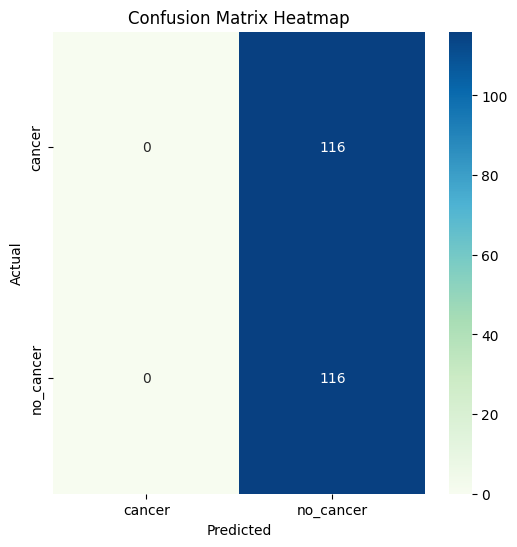

In [42]:
# Make the plot
plt.figure(figsize=(6, 6))

# Plotting
sns.heatmap(cm, 
            annot = True, 
            cmap = "GnBu", 
            fmt = "g", 
            xticklabels = class_labels, 
            yticklabels = class_labels)

# Adding labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Show plot
plt.show()